In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the data and feature names
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable (species) to the DataFrame
iris_df['species'] = iris.target

# Display the first 5 rows of the DataFrame
display(iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


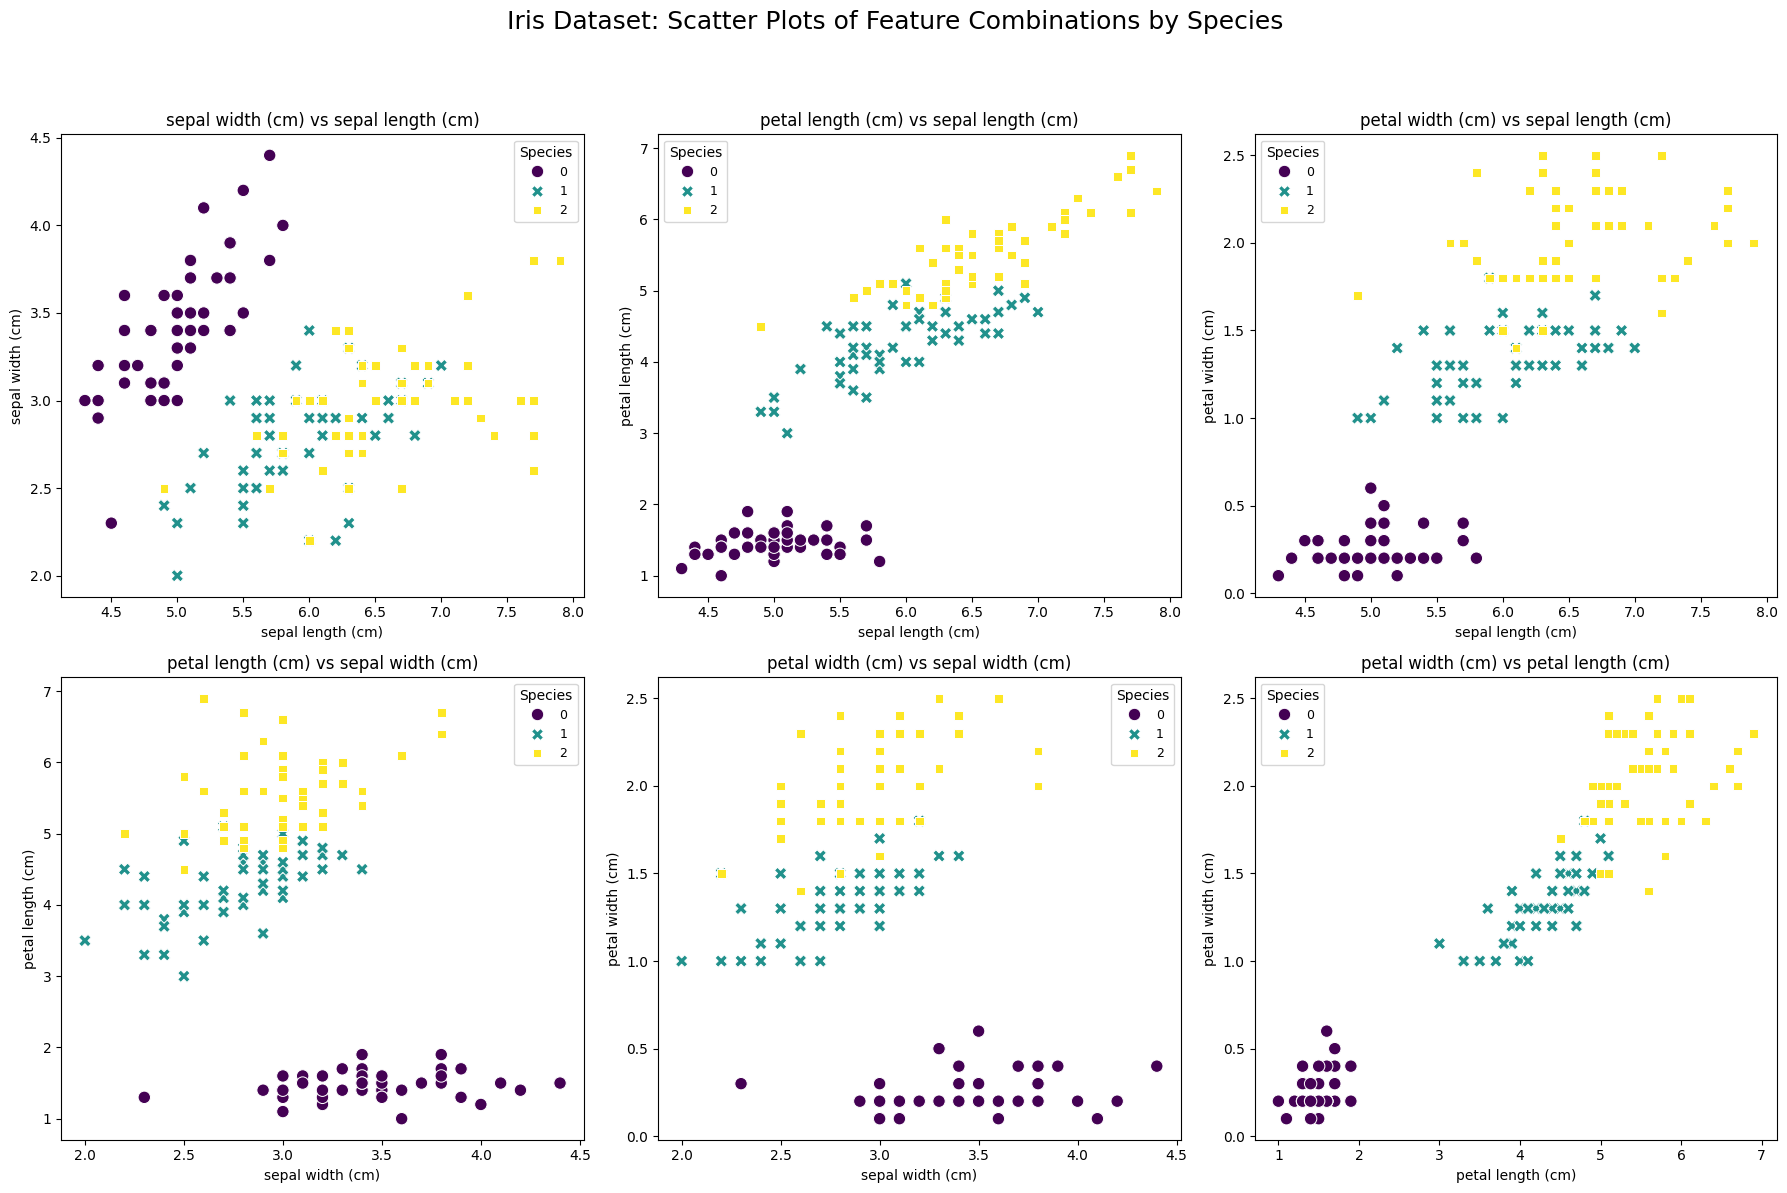

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the feature names, excluding the 'species' column
features = iris_df.columns[:-1]

# Define the combinations of features for scatter plots
combinations = [
    (features[0], features[1]), # sepal length vs sepal width
    (features[0], features[2]), # sepal length vs petal length
    (features[0], features[3]), # sepal length vs petal width
    (features[1], features[2]), # sepal width vs petal length
    (features[1], features[3]), # sepal width vs petal width
    (features[2], features[3])  # petal length vs petal width
]

# Create a figure and a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten() # Flatten the 2x3 array of axes for easier iteration

# Iterate through combinations and create a scatter plot for each
for i, (x_feature, y_feature) in enumerate(combinations):
    sns.scatterplot(
        data=iris_df,
        x=x_feature,
        y=y_feature,
        hue='species',      # Color points based on species
        style='species',    # Use different markers for each species
        ax=axes[i],
        palette='viridis',  # Use a distinct color palette
        s=80                # Adjust marker size for better visibility
    )
    axes[i].set_title(f'{y_feature} vs {x_feature}', fontsize=12)
    axes[i].set_xlabel(x_feature, fontsize=10)
    axes[i].set_ylabel(y_feature, fontsize=10)
    axes[i].legend(title='Species', fontsize=9, title_fontsize=10)

# Add an overall title to the figure and adjust layout
plt.suptitle('Iris Dataset: Scatter Plots of Feature Combinations by Species', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent titles from overlapping
plt.show()

In [3]:
import numpy as np
from scipy.stats import multivariate_normal

# Group the DataFrame by 'species'
grouped_by_species = iris_df.groupby('species')

species_means = {}
species_covariances = {}
species_priors = {}

total_samples = len(iris_df)

print('--- Mean for each Iris Variety ---')
for species_id, group in grouped_by_species:
    mean_val = group.drop(columns='species').mean()
    cov_val = group.drop(columns='species').cov()

    species_means[species_id] = mean_val.values # Store as numpy array
    species_covariances[species_id] = cov_val.values # Store as numpy array
    species_priors[species_id] = len(group) / total_samples # Store prior

    print(f'\nSpecies {species_id} (Mean):')
    display(mean_val)

print('\n--- Covariance Matrix for each Iris Variety ---')
for species_id, group in grouped_by_species:
    print(f'\nSpecies {species_id} (Covariance Matrix):')
    display(group.drop(columns='species').cov())


--- Mean for each Iris Variety ---

Species 0 (Mean):


,0
sepal length (cm),5.006
sepal width (cm),3.428
petal length (cm),1.462
petal width (cm),0.246



Species 1 (Mean):


,0
sepal length (cm),5.936
sepal width (cm),2.770
petal length (cm),4.260
petal width (cm),1.326



Species 2 (Mean):


,0
sepal length (cm),6.588
sepal width (cm),2.974
petal length (cm),5.552
petal width (cm),2.026



--- Covariance Matrix for each Iris Variety ---

Species 0 (Covariance Matrix):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.124249,0.099216,0.016355,0.010331
sepal width (cm),0.099216,0.143690,0.011698,0.009298
petal length (cm),0.016355,0.011698,0.030159,0.006069
petal width (cm),0.010331,0.009298,0.006069,0.011106



Species 1 (Covariance Matrix):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.266433,0.085184,0.182898,0.055780
sepal width (cm),0.085184,0.098469,0.082653,0.041204
petal length (cm),0.182898,0.082653,0.220816,0.073102
petal width (cm),0.055780,0.041204,0.073102,0.039106



Species 2 (Covariance Matrix):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.404343,0.093763,0.303290,0.049094
sepal width (cm),0.093763,0.104004,0.071380,0.047629
petal length (cm),0.303290,0.071380,0.304588,0.048824
petal width (cm),0.049094,0.047629,0.048824,0.075433


In [4]:
def calculate_posterior(x, species_id):
    # p(x | species) - Likelihood
    # multivariate_normal.pdf returns the probability density function value at x
    likelihood = multivariate_normal.pdf(x, mean=species_means[species_id], cov=species_covariances[species_id])

    # p(species) - Prior
    prior = species_priors[species_id]

    # Numerator of Bayes' theorem: p(x | species) * p(species)
    numerator = likelihood * prior

    # Denominator of Bayes' theorem: Sum of (p(x | species_k) * p(species_k)) for all species_k
    # This is the marginal likelihood p(x)
    denominator = 0
    for s_id in species_means.keys():
        denominator += multivariate_normal.pdf(x, mean=species_means[s_id], cov=species_covariances[s_id]) * species_priors[s_id]

    # Handle case where denominator might be zero to avoid division by zero
    if denominator == 0:
        return 0

    # Posterior probability p(species | x)
    posterior = numerator / denominator
    return posterior

# Example usage with an arbitrary data point (e.g., from the dataset)
# Let's pick an example data point x (e.g., the first row of iris_df without species column)
example_x = iris_df.drop(columns='species').iloc[0].values

print(f"For a sample with features: {example_x}")

# Calculate posterior for each species
posterior_setosa = calculate_posterior(example_x, 0)
posterior_versicolor = calculate_posterior(example_x, 1)
posterior_virginica = calculate_posterior(example_x, 2)

print(f"p(setosa | x)       = {posterior_setosa:.4f}")
print(f"p(versicolor | x)   = {posterior_versicolor:.4f}")
print(f"p(virginica | x)    = {posterior_virginica:.4f}")

# Another example data point (e.g., from Species 1)
example_x_1 = iris_df.drop(columns='species').iloc[50].values

print(f"\nFor a sample with features: {example_x_1}")

posterior_setosa_1 = calculate_posterior(example_x_1, 0)
posterior_versicolor_1 = calculate_posterior(example_x_1, 1)
posterior_virginica_1 = calculate_posterior(example_x_1, 2)

print(f"p(setosa | x)       = {posterior_setosa_1:.4f}")
print(f"p(versicolor | x)   = {posterior_versicolor_1:.4f}")
print(f"p(virginica | x)    = {posterior_virginica_1:.4f}")


For a sample with features: [5.1 3.5 1.4 0.2]
p(setosa | x)       = 1.0000
p(versicolor | x)   = 0.0000
p(virginica | x)    = 0.0000

For a sample with features: [7.  3.2 4.7 1.4]
p(setosa | x)       = 0.0000
p(versicolor | x)   = 1.0000
p(virginica | x)    = 0.0000


In [5]:
# Pick another arbitrary data point from the 'versicolor' species (species_id = 1)
# For example, let's pick the 51st row, which is known to be versicolor
# We check that it's a versicolor (species_id = 1)
versicolor_example_index = 51
chosen_versicolor_x = iris_df.drop(columns='species').iloc[versicolor_example_index].values
actual_species = iris_df['species'].iloc[versicolor_example_index]

print(f"Selected an arbitrary sample (row {versicolor_example_index}) from the dataset with features: {chosen_versicolor_x}")
print(f"Actual species for this sample is: {actual_species} (Versicolor)")

# Calculate posterior for each species
posterior_setosa_new = calculate_posterior(chosen_versicolor_x, 0)
posterior_versicolor_new = calculate_posterior(chosen_versicolor_x, 1)
posterior_virginica_new = calculate_posterior(chosen_versicolor_x, 2)

print(f"\nPosterior probabilities for this sample:")
print(f"p(setosa | x)       = {posterior_setosa_new:.4f}")
print(f"p(versicolor | x)   = {posterior_versicolor_new:.4f}")
print(f"p(virginica | x)    = {posterior_virginica_new:.4f}")

Selected an arbitrary sample (row 51) from the dataset with features: [6.4 3.2 4.5 1.5]
Actual species for this sample is: 1 (Versicolor)

Posterior probabilities for this sample:
p(setosa | x)       = 0.0000
p(versicolor | x)   = 0.9996
p(virginica | x)    = 0.0004


In [6]:
correct_predictions = 0
total_samples = len(iris_df)

# Iterate through each sample in the dataset
for index, row in iris_df.iterrows():
    features = row.drop('species').values
    actual_species = row['species']

    # Calculate posterior probabilities for each species
    posterior_probabilities = {
        0: calculate_posterior(features, 0),
        1: calculate_posterior(features, 1),
        2: calculate_posterior(features, 2)
    }

    # Predict the species with the highest posterior probability
    predicted_species = max(posterior_probabilities, key=posterior_probabilities.get)

    # Check if the prediction is correct
    if predicted_species == actual_species:
        correct_predictions += 1

# Calculate the overall accuracy
accuracy = correct_predictions / total_samples

print(f"Total samples: {total_samples}")
print(f"Correct predictions: {correct_predictions}")
print(f"Classification Accuracy: {accuracy:.4f}")

Total samples: 150
Correct predictions: 147
Classification Accuracy: 0.9800


# Task
Calculate the Euclidean distance from each data point in the `iris_df` to the mean of each species and classify the data point to the species with the closest mean. Then, compare the predicted species with the actual species for all data points and calculate the overall classification accuracy based on the closest mean method.

## Classify by Closest Mean

### Subtask:
Calculate the Euclidean distance from each data point to the mean of each species and classify the data point to the species with the closest mean.


**Reasoning**:
To classify each data point by the closest mean, I need to first import the `euclidean` distance function, then iterate through each row of the `iris_df`, calculate the distance to each species' mean, and finally determine the species with the minimum distance, storing the results in a list.



In [7]:
from scipy.spatial.distance import euclidean

predicted_species_closest_mean = []

for index, row in iris_df.iterrows():
    features = row.drop('species').values

    distances = {}
    for species_id, mean_vector in species_means.items():
        distances[species_id] = euclidean(features, mean_vector)

    # Find the species with the minimum distance
    predicted_species_id = min(distances, key=distances.get)
    predicted_species_closest_mean.append(predicted_species_id)

print(f"Predicted species for the first 5 samples: {predicted_species_closest_mean[:5]}")
print(f"Length of predicted species list: {len(predicted_species_closest_mean)}")

Predicted species for the first 5 samples: [0, 0, 0, 0, 0]
Length of predicted species list: 150


**Reasoning**:
Now that the predicted species based on the closest mean have been generated, the next step is to compare these predictions with the actual species labels and calculate the classification accuracy for this method.



In [8]:
correct_predictions_closest_mean = 0
total_samples_closest_mean = len(iris_df)

for i in range(total_samples_closest_mean):
    actual_species = iris_df['species'].iloc[i]
    predicted_species = predicted_species_closest_mean[i]

    if predicted_species == actual_species:
        correct_predictions_closest_mean += 1

accuracy_closest_mean = correct_predictions_closest_mean / total_samples_closest_mean

print(f"Total samples: {total_samples_closest_mean}")
print(f"Correct predictions (Closest Mean): {correct_predictions_closest_mean}")
print(f"Classification Accuracy (Closest Mean): {accuracy_closest_mean:.4f}")

Total samples: 150
Correct predictions (Closest Mean): 139
Classification Accuracy (Closest Mean): 0.9267


## Summary:

### Q&A
What is the overall classification accuracy based on the closest mean method?
The overall classification accuracy based on the closest mean method is 0.9267.

### Data Analysis Key Findings
*   The classification accuracy using the closest mean method is approximately 92.67%.
*   Out of 150 total samples, 139 were correctly predicted by classifying each data point to the species with the closest mean.

### Insights or Next Steps
*   The closest mean method provides a good baseline classification accuracy for the Iris dataset.
*   Further analysis could involve comparing this accuracy to more sophisticated classification algorithms (e.g., k-Nearest Neighbors, Support Vector Machines) to evaluate its performance relative to other methods.
